# Measurement 4-5GHz 1 phase shifter

## Imports

In [1]:
import pocketvna
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
from stlab.devices.Vaunix_Phase import Vaunix_Phase
import time

Could not load "PocketVnaApi_x64" by systempath. Trying another one "C:\Users\Jacco\Documents\GitHub\bep-jacco-van-leenen\Code\PocketVnaApi_x64.dll"


## VNA

In [8]:
# Connecting the VNA
driver = pocketvna.Driver()

print('Driver is created: {} devices connected..'.format(driver.count()))
for i in range(0, driver.count()):
    print('Device {}'.format(i))
    print('\t {}'.format(driver.info_at(i)))

if not driver.connect_to(0):
    print('Failed to connect')

Driver is created: 1 devices connected..
Device 0
	 {'index': 0, 'path:': b'\\\\?\\hid#vid_03eb&pid_2402#7&1fc8f206&0&0000#{4d1e55b2-f16f-11cf-88cb-001111000030}', 'version': 512, 'SN': '12xxxEF', 'product': '', 'vendor': 'Martin', 'read': True, 'write': True}


## Phase Shifter

In [9]:
# Connecting the phase shifters
ph1 = Vaunix_Phase(23869)
# ph2 = Vaunix_phase(19164)

# Setting the frquency to the minimum
ph1.SetFrequency(4000000000)
# ph2.SetFrequency(4000000000)

# Setting the phase to the minimum
ph1.SetPhase(0)
# ph2.SetPhase(0)

# Checking if the phases and the frequencies are set correctly
print("Phase of Phase Shifter 1: {}\nFrequency of Phase Shifter 1: {}".format(ph1.GetPhase(), ph1.GetFrequency()))
# print("Phase of Phase Shifter 2: {}\nFrequency of Phase Shifter 2: {}".format(ph2.GetPhase(), ph2.GetFrequency()))

status: 0
Phase of Phase Shifter 1: 0.0
Frequency of Phase Shifter 1: 4000000000.0


## Calibration Folder

In [23]:
# Setting the folder where the calibration data will be stored

# Main folder
calibration_folder_name = "Calibration_2"

# Checking if the folder exists. If it doesn't it will create the folder
if not os.path.exists(calibration_folder_name):
    os.mkdir(calibration_folder_name)

## Measurement Folder

In [10]:
# Setting the folder where the measurement data will be stored

# Main folder
measurement_folder_name = "Measurements_4"

# Checking if the folder exists. If it doesn't it will create the folder
if not os.path.exists(measurement_folder_name):
    os.mkdir(measurement_folder_name)

## Calibration data

In [6]:
# Calibrating

# saving the data
def data_saving(s21, name, steps):
    file_name ="trans_{}_4-5GHz_{}_steps_phase_shifter.dat".format(name, steps)
    save_name = os.path.join("Calibration_2", file_name)
    data = np.column_stack((s21.real, s21.imag))
    np.savetxt(save_name, data)
    print("Saved: " + save_name)

#  ---------------Open and through measurement---------------
# How many measure points between the start and end
steps = 1001
# Start at 4_000_000_000 
start = 4000000000
# End at 5_000_000_000
end = 5000000000
# Average amount of measurements per point
average = 20

ph1.SetPhase(0)

# Frequency array
freq = np.linspace(start, end, steps, dtype=np.uint64)

#  ---------------Open Measurement---------------
# Measuring
input("Open Measurement")
s11, s21, s12, s22 = driver.scan(freq, average, pocketvna.NetworkParams.S21)

# Saving the data
data_saving(s21, "open", steps)

#  ---------------through Measurement---------------
# Measuring
input("Through Measurement")
s11, s21, s12, s22 = driver.scan(freq, average, pocketvna.NetworkParams.S21)

# Saving the data
data_saving(s21, "through", steps)

Open Measurement
Saved: Calibration_2\trans_open_4-5GHz_1001_steps_phase_shifter.dat
Through Measurement
Saved: Calibration_2\trans_through_4-5GHz_1001_steps_phase_shifter.dat


## Measuring

In [15]:
#### Measuring
# Saving data
def data_saving(s21, name, steps):
    file_name ="{}_4-5GHz_{}_steps_real.dat".format(name, steps)
    save_name = os.path.join("Measurements_4", file_name)
    np.savetxt(save_name, s21.real)
    print("Saved: " + save_name)
    file_name ="{}_4-5GHz_{}_steps_imag.dat".format(name, steps)
    save_name = os.path.join("Measurements_4", file_name)
    np.savetxt(save_name, s21.imag)
    print("Saved: " + save_name)
    
    
def calibrating_data(s21, steps):
    file_name = "trans_open_4-5GHz_{}_steps.dat".format(steps)
    save_name = os.path.join("Calibration_2", file_name)
    trans_open = np.loadtxt(save_name)
    t_open = trans_open[:, 0] + trans_open[:, 1] * 1j

    file_name = "trans_through_4-5GHz_{}_steps.dat".format(steps)
    save_name = os.path.join("Calibration_2", file_name)
    trans_through = np.loadtxt(save_name)
    t_through = trans_through[:, 0] + trans_through[:, 1] * 1j
    
    cal_s21 = (s21 - t_open) / (t_through - t_open)
    return cal_s21

def calibrating_data_2(s21, steps):
    file_name = "trans_open_4-5GHz_{}_steps_phase_shifter.dat".format(steps)
    save_name = os.path.join("Calibration_2", file_name)
    trans_open = np.loadtxt(save_name)
    t_open = trans_open[:, 0] + trans_open[:, 1] * 1j

    file_name = "trans_through_4-5GHz_{}_steps_phase_shifter.dat".format(steps)
    save_name = os.path.join("Calibration_2", file_name)
    trans_through = np.loadtxt(save_name)
    t_through = trans_through[:, 0] + trans_through[:, 1] * 1j

    cal_s21 = (s21 - t_open) / (t_through - t_open)
    return cal_s21
    

#  ---------------Open and through measurement---------------
# Amount of steps between the given frequencies
steps = 1001
# Start at 4_000_000_000 
start = 4000000000
# End at 5_000_000_000
end = 5000000000
# Average amount of measurements per point
average = 10

# name to be given to the data
# name = "interferometer"
name = "interferometer_1_phase_shifter"
# name = "Through_1_phase_shifter"

# Frequency array
freq = np.linspace(start, end, steps, dtype=np.uint64)

# Empty S21 array
s21 = np.zeros((steps, 361), dtype=np.complex)
cal_s21 = np.zeros((steps, 361), dtype=np.complex)
cal_s21_2 = np.zeros((steps, 361), dtype=np.complex)

# Phase Shift
ph1_start = 0
ph1_end = 360
ph1_step_size = 1
phase_shift_1 = np.arange(ph1_start, ph1_end + 1, ph1_step_size)


#  ---------------Measuring---------------
for deg in phase_shift_1:
    
    print("\tAcquiring data for phase shift of {} degrees".format(deg))

    # Setting the phase of the phase shifter
    ph1.SetPhase(deg)

    # For the response time of the phase shifter
    time.sleep(0.1)

    # The Measurement
    s11, s21[:, deg], s12, s22 = driver.scan(freq, average, pocketvna.NetworkParams.S21)
    
    cal_s21[:, deg] = calibrating_data(s21[:, deg], steps)
    cal_s21_2[:, deg] = calibrating_data_2(s21[:, deg], steps)

# Data Saving
data_saving(s21, name, steps)
data_saving(cal_s21, name + "_cal", steps)
data_saving(cal_s21_2, name + "_cal_2", steps)

	Acquiring data for phase shift of 0 degrees
	Acquiring data for phase shift of 1 degrees
	Acquiring data for phase shift of 2 degrees
	Acquiring data for phase shift of 3 degrees
	Acquiring data for phase shift of 4 degrees
	Acquiring data for phase shift of 5 degrees
	Acquiring data for phase shift of 6 degrees
	Acquiring data for phase shift of 7 degrees
	Acquiring data for phase shift of 8 degrees
	Acquiring data for phase shift of 9 degrees
	Acquiring data for phase shift of 10 degrees
	Acquiring data for phase shift of 11 degrees
	Acquiring data for phase shift of 12 degrees
	Acquiring data for phase shift of 13 degrees
	Acquiring data for phase shift of 14 degrees
	Acquiring data for phase shift of 15 degrees
	Acquiring data for phase shift of 16 degrees
	Acquiring data for phase shift of 17 degrees
	Acquiring data for phase shift of 18 degrees
	Acquiring data for phase shift of 19 degrees
	Acquiring data for phase shift of 20 degrees
	Acquiring data for phase shift of 21 degree

	Acquiring data for phase shift of 177 degrees
	Acquiring data for phase shift of 178 degrees
	Acquiring data for phase shift of 179 degrees
	Acquiring data for phase shift of 180 degrees
	Acquiring data for phase shift of 181 degrees
	Acquiring data for phase shift of 182 degrees
	Acquiring data for phase shift of 183 degrees
	Acquiring data for phase shift of 184 degrees
	Acquiring data for phase shift of 185 degrees
	Acquiring data for phase shift of 186 degrees
	Acquiring data for phase shift of 187 degrees
	Acquiring data for phase shift of 188 degrees
	Acquiring data for phase shift of 189 degrees
	Acquiring data for phase shift of 190 degrees
	Acquiring data for phase shift of 191 degrees
	Acquiring data for phase shift of 192 degrees
	Acquiring data for phase shift of 193 degrees
	Acquiring data for phase shift of 194 degrees
	Acquiring data for phase shift of 195 degrees
	Acquiring data for phase shift of 196 degrees
	Acquiring data for phase shift of 197 degrees
	Acquiring da

	Acquiring data for phase shift of 352 degrees
	Acquiring data for phase shift of 353 degrees
	Acquiring data for phase shift of 354 degrees
	Acquiring data for phase shift of 355 degrees
	Acquiring data for phase shift of 356 degrees
	Acquiring data for phase shift of 357 degrees
	Acquiring data for phase shift of 358 degrees
	Acquiring data for phase shift of 359 degrees
	Acquiring data for phase shift of 360 degrees


TypeError: data_saving() takes 2 positional arguments but 3 were given

In [16]:
def data_saving(s21, name, steps):
    file_name ="{}_4-5GHz_{}_steps_real.dat".format(name, steps)
    save_name = os.path.join("Measurements_4", file_name)
    np.savetxt(save_name, s21.real)
    print("Saved: " + save_name)
    file_name ="{}_4-5GHz_{}_steps_imag.dat".format(name, steps)
    save_name = os.path.join("Measurements_4", file_name)
    np.savetxt(save_name, s21.imag)
    print("Saved: " + save_name)
    
# Data Saving
data_saving(s21, name, steps)
data_saving(cal_s21, name + "_cal", steps)
data_saving(cal_s21_2, name + "_cal_2", steps)

Saved: Measurements_4\interferometer_1_phase_shifter_4-5GHz_1001_steps_real.dat
Saved: Measurements_4\interferometer_1_phase_shifter_4-5GHz_1001_steps_imag.dat
Saved: Measurements_4\interferometer_1_phase_shifter_cal_4-5GHz_1001_steps_real.dat
Saved: Measurements_4\interferometer_1_phase_shifter_cal_4-5GHz_1001_steps_imag.dat
Saved: Measurements_4\interferometer_1_phase_shifter_cal_2_4-5GHz_1001_steps_real.dat
Saved: Measurements_4\interferometer_1_phase_shifter_cal_2_4-5GHz_1001_steps_imag.dat


## Plotting

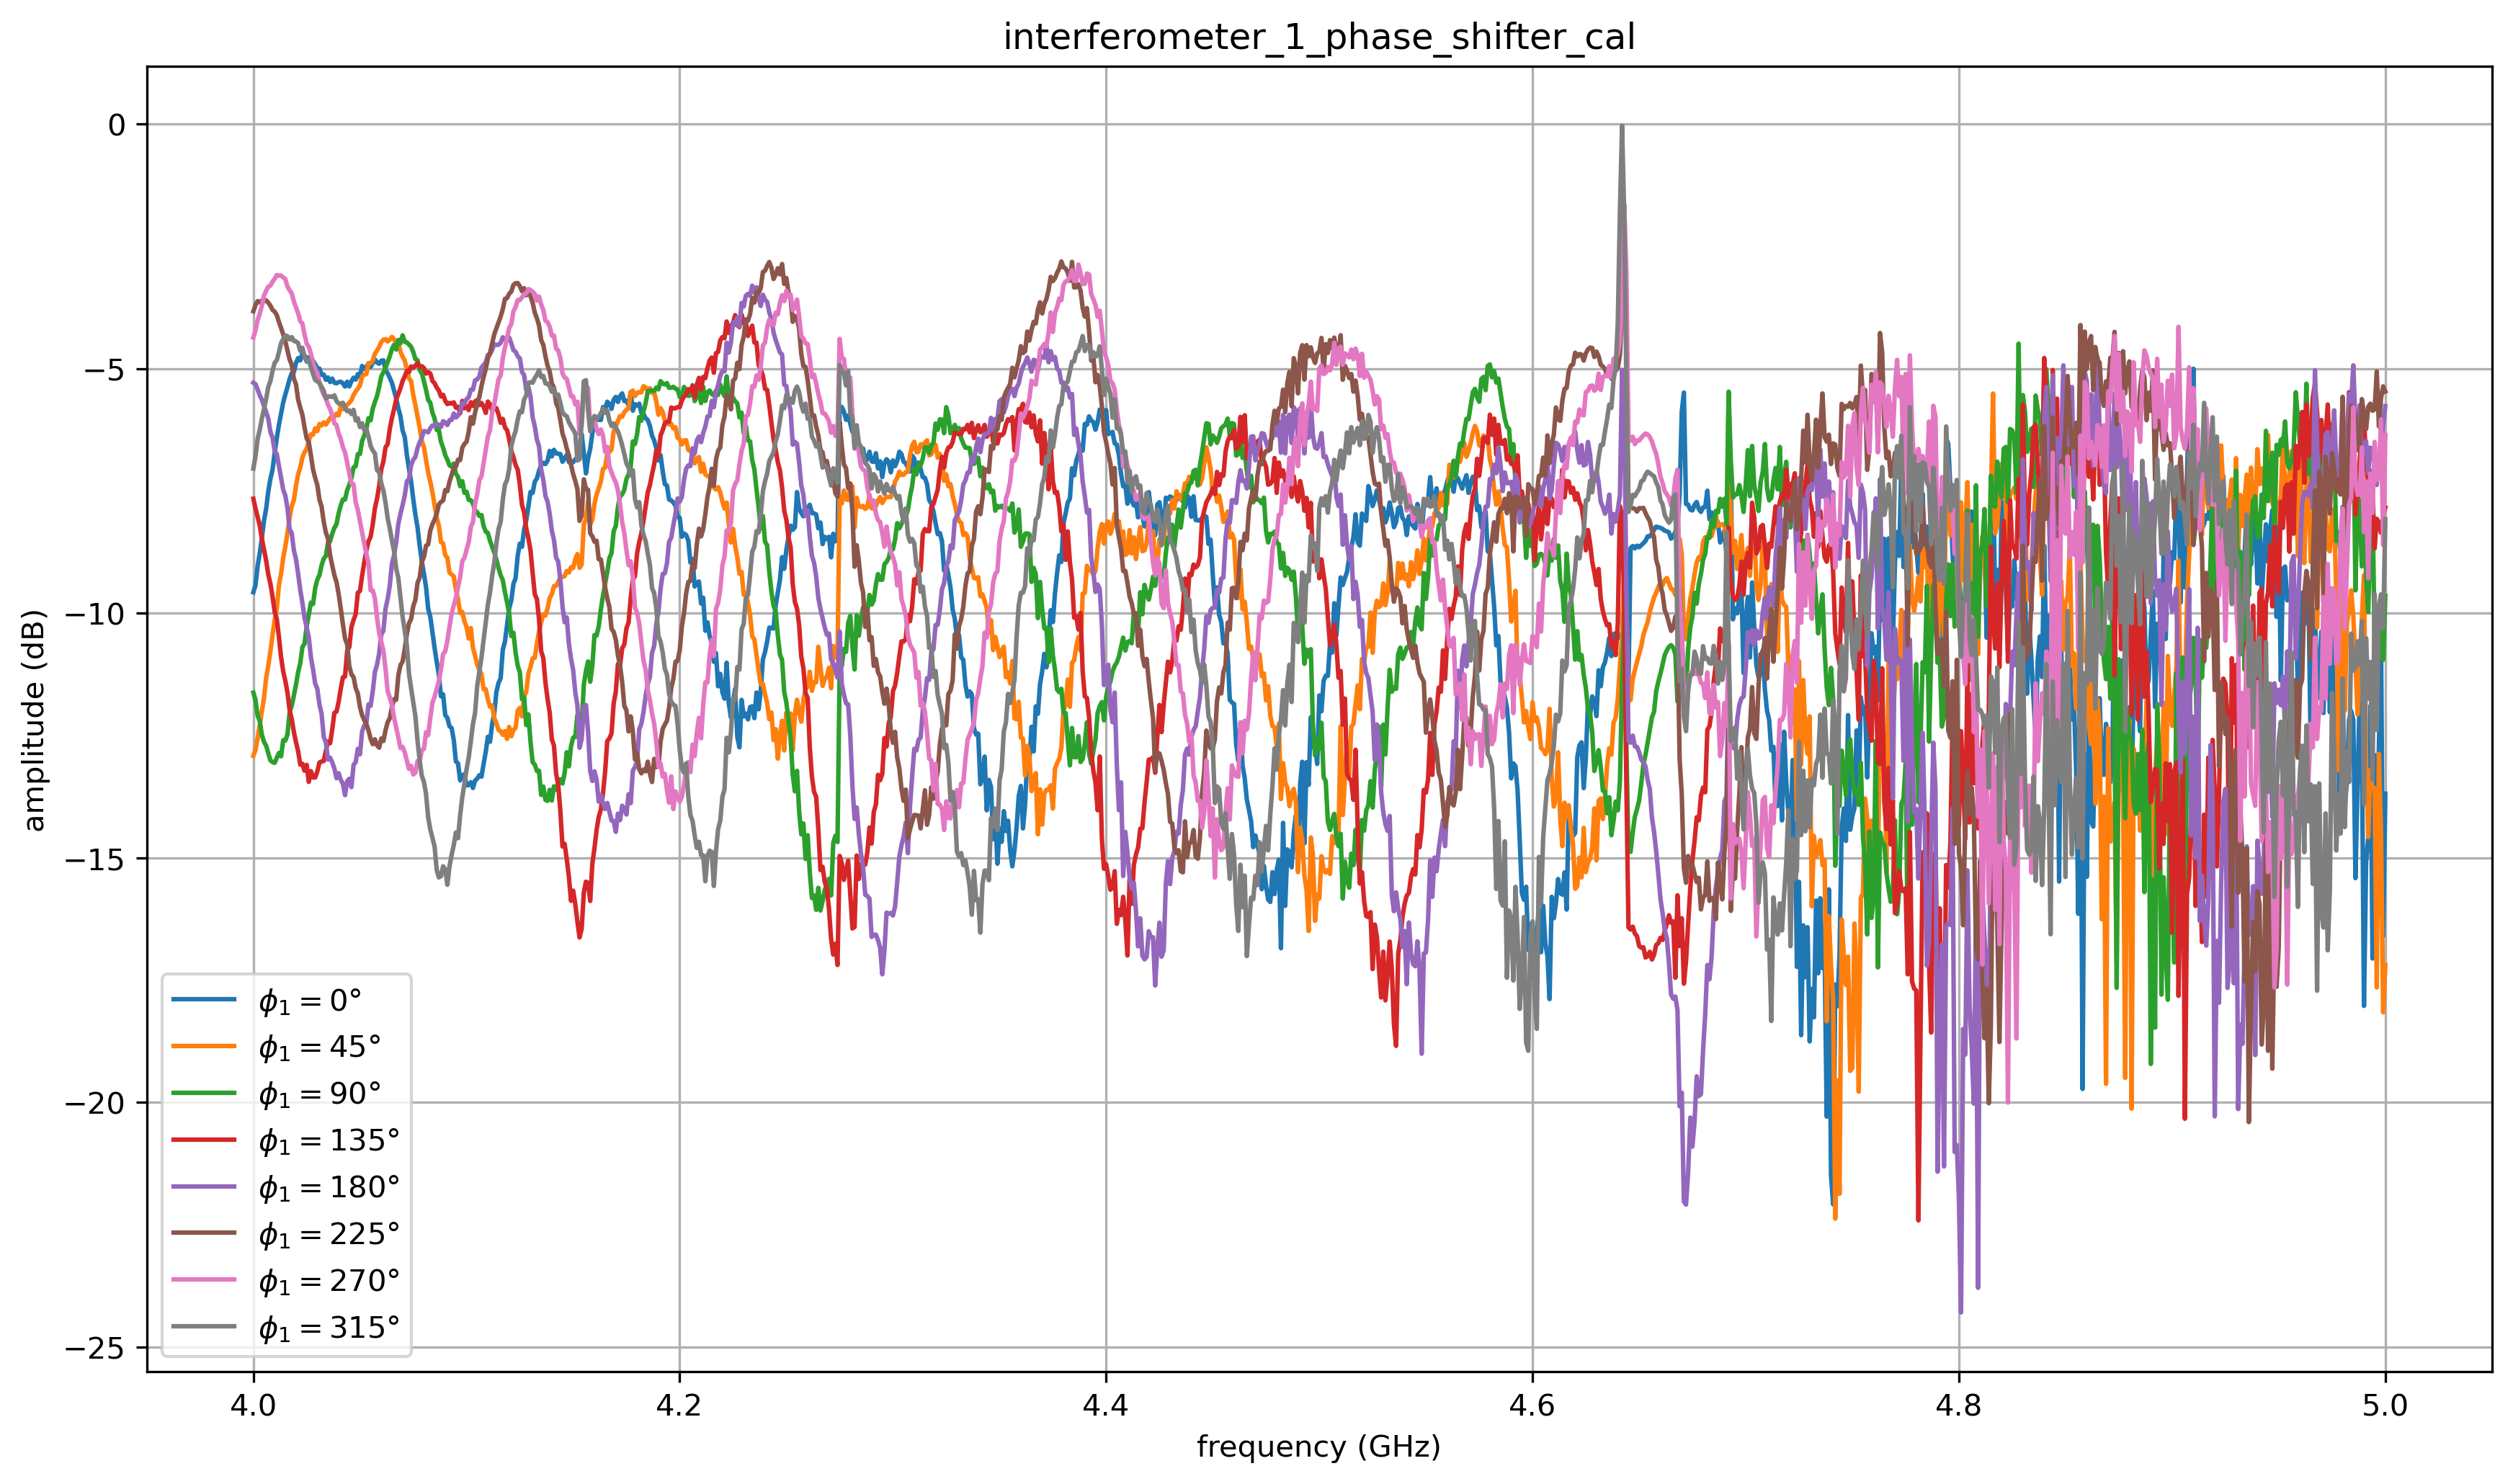

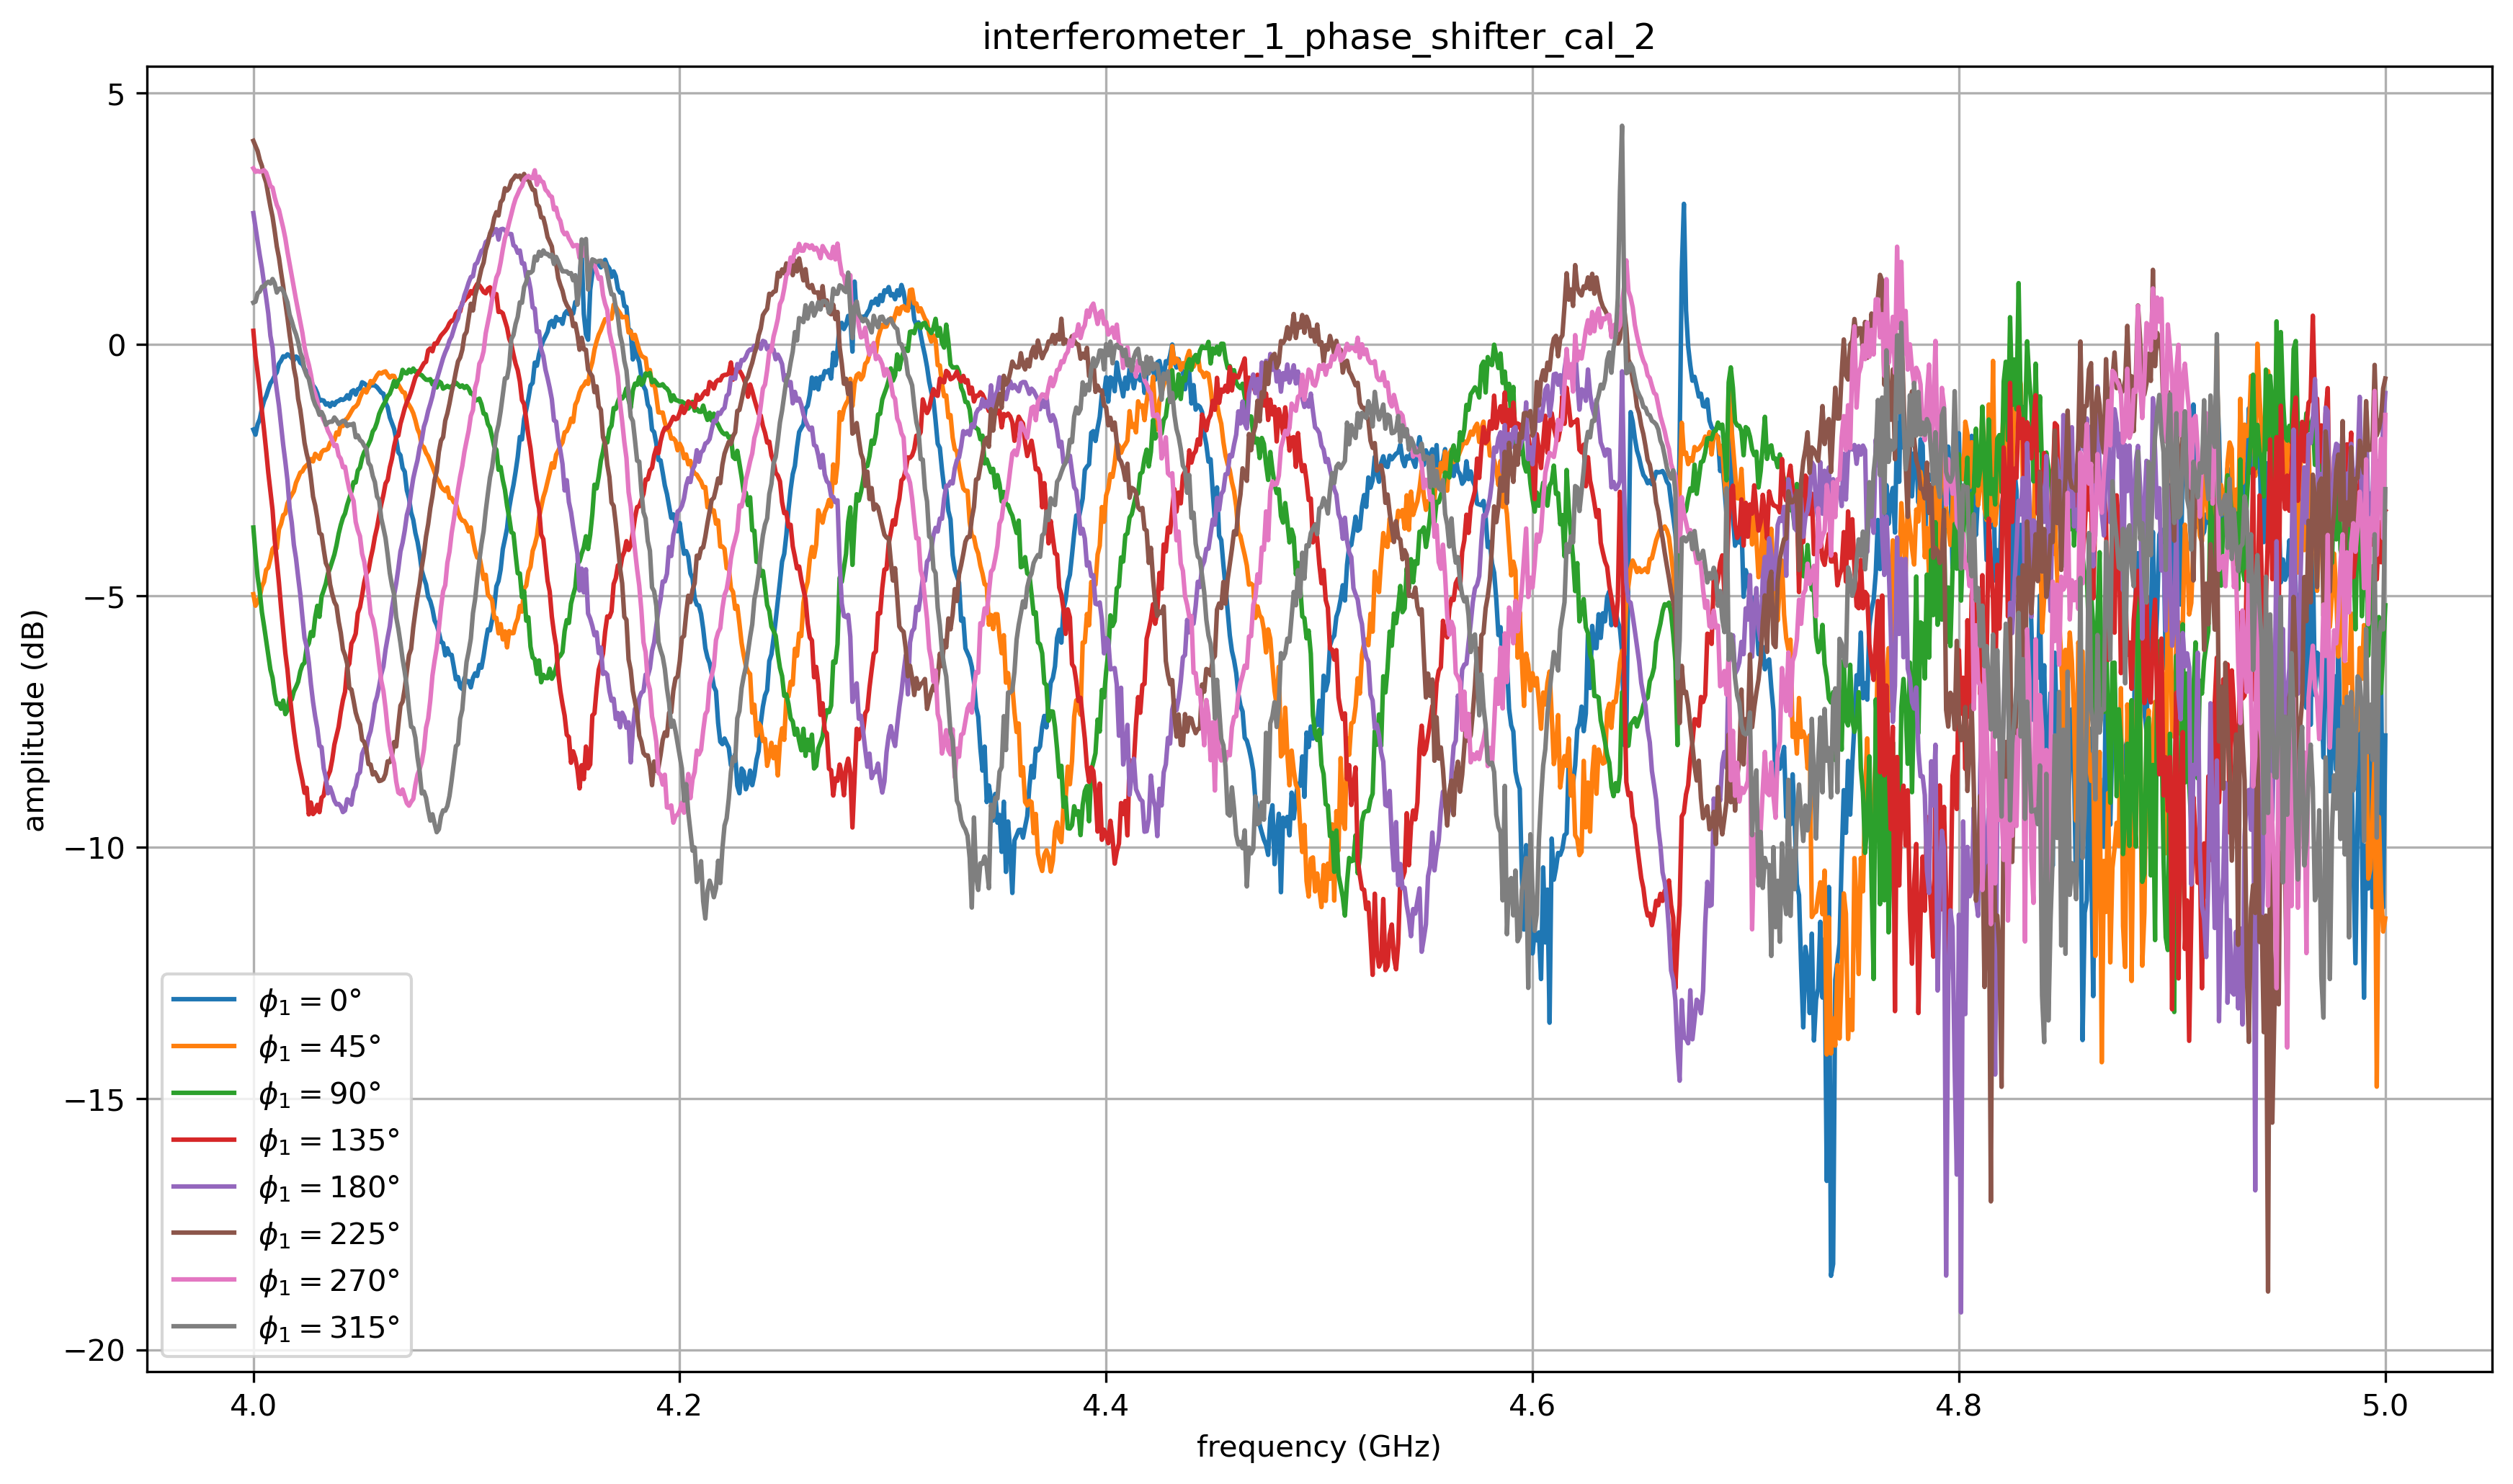

In [2]:
# Plotting the measurements

def opening_files(steps, name, phase_shift_1):
    
    # We don't need much of the data so we pick the specific columns
    # Empty array
    s21_new = np.zeros((steps, len(phase_shift_1)), dtype=np.complex)
    
    for i in range(len(phase_shift_1)):

        # Getting the uncalibrated data and putting it together
        file_name = "{}_4-5GHz_{}_steps_real.dat".format(name, steps)
        save_name = os.path.join("Measurements_4", file_name)
        s21_real = np.loadtxt(save_name)
        file_name = "{}_4-5GHz_{}_steps_imag.dat".format(name, steps)
        save_name = os.path.join("Measurements_4", file_name)
        s21_imag = np.loadtxt(save_name)
        s21 = s21_real + s21_imag * 1j
        
        # Putting columns of one array in the other
        s21_new[:, i] = s21[:, phase_shift_1[i]]

    return s21_new

def get_labels(phase_shift_1, degree_sign):
    labels = []
    for i in range(len(phase_shift_1)):
        labels.append("$\phi_1 = ${}{}".format(phase_shift_1[i], degree_sign))
    return labels

def plot_amplitude(s21, labels, name, steps):
    # Set the frequency array
    freq = np.linspace(4, 5, steps)
    
    # Setting an empty frequency array
    f = np.zeros((steps, len(labels)))
    
    # filling the frequency array to the same size as s21
    f = f + freq[:, None]
    
    # Getting the amplitude from the complex data
    amp_s21 = np.sqrt(s21.real**2 + s21.imag**2)
    
    # Setting the amplitude in dB
    amp_s21 = 20*np.log10(amp_s21)
    
    # Plotting
    plt.figure(name)
    plt.plot(f, amp_s21, "-")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("amplitude (dB)")
    plt.legend(labels)
    plt.grid()
    plt.title(name)
    
def plot_phase(s21, labels):
    # Set the frequency array
    freq = np.linspace(4, 5, 101)
    
    # Setting an empty frequency array
    f = np.zeros((101, len(labels)))
    
    # filling the frequency array to the same size as s21
    f = f + freq[:, None]
    
    # Setting the phase from the complex data
    phase = np.arctan2(s21.imag, s21.real)
    phase -= phase[:, 0, None]
    
    # Phase from radians to degrees
    phase = phase * 180/np.pi
    phase[phase< -180] += 360
    phase[phase > 180] -= 360
    
    # Plotting
    plt.figure(name+"phase")
    plt.plot(f, phase, ".")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("phase (degrees)")
    plt.legend(labels)
    plt.grid()
    plt.title(name + " Phase")

# Opening the measurement data file
# name = "Through_1_phase_shifter"
# name = "michelson_interferometer_1_phase_shifter"
# name = "interferometer"
name = "interferometer_1_phase_shifter"
start = 4
end = 5
steps = 1001
phase_shift = [0, 45, 90, 135, 180, 225, 270, 315]

#
degrees_sign = u'\N{DEGREE SIGN}'

# Setting the figure size of the plots
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 300

# ---------------------------------Opening Measurement Files-------------------------------
s21 = opening_files(steps, name, phase_shift)
cal_s21 = opening_files(steps, name + "_cal", phase_shift)
cal_s21_2 = opening_files(steps, name + "_cal_2", phase_shift)

# ------------------------------------Plotting Amplitude-----------------------------------
# Making labels
labels = get_labels(phase_shift, degrees_sign)

# plot_amplitude(s21, labels, name, steps)
plot_amplitude(cal_s21, labels, name + "_cal", steps)
plot_amplitude(cal_s21_2, labels, name + "_cal_2", steps)

# ---------------Plotting Phase-----------------
# plot_phase(s21, labels)